In [ ]:
! pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 


In [ ]:
from urllib.request import urlopen

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import VerticalPitch, Pitch, FontManager, add_image

In [ ]:
URL = 'https://fbref.com/es/share/bgxRY'
df = pd.read_html(URL)[0]
# select a subset of the columns (Squad and touches columns)
# df = df[['Unnamed: 0_level_0', 'Touches']].copy()
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index
# df = df.drop(["Def Pen", "Att Pen", "Live"], axis = 1) # drop the def pen, att pen, live touches column
df

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Sergio Akieme,DF,14,14,1260,14.0
1,Rodrigo Ely,DF,14,14,1233,13.7
2,Fernando,PO,13,13,1170,13.0
3,Lucas Robertone,CC,14,13,1016,11.3
4,Srđan Babić,DF,13,12,1125,12.5
5,Largie Ramazani,DL,14,9,799,8.9
6,Samu Costa,CC,11,8,768,8.5
7,Léo Baptistão,"DL,CC",11,8,564,6.3
8,El Bilal Touré,DL,8,7,568,6.3
9,Gonzalo Melero,CC,8,7,536,6.0


In [ ]:
df = df.drop(df[df['Titular']=='Tiem'].index)
df = df.drop(df[df['Jugador']=='Jugador'].index)
df = df.drop(df[df['Jugador']=='Umar Sadiq'].index)
df = df.drop(df[df['Jugador']=='Curro'].index)
df = df.drop(df[df['Jugador']=='José Carlos Lazo'].index)
df = df.drop(df[df['Jugador']=='Arvin Appiah'].index)
df = df.drop(df[df['Jugador']=='Total del equipo'].index)
df = df.drop(df[df['Jugador']=='Total del oponente'].index)
df = df.reset_index(drop=True)
df

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Sergio Akieme,DF,14,14,1260,14.0
1,Rodrigo Ely,DF,14,14,1233,13.7
2,Fernando,PO,13,13,1170,13.0
3,Lucas Robertone,CC,14,13,1016,11.3
4,Srđan Babić,DF,13,12,1125,12.5
5,Largie Ramazani,DL,14,9,799,8.9
6,Samu Costa,CC,11,8,768,8.5
7,Léo Baptistão,"DL,CC",11,8,564,6.3
8,El Bilal Touré,DL,8,7,568,6.3
9,Gonzalo Melero,CC,8,7,536,6.0


In [ ]:
df_porteros = df[(df['Posc'] == 'PO')]
df_porteros = df_porteros.reset_index(drop=True)
df_defensas = df[(df['Posc'] == 'DF')]
df_defensas = df_defensas.reset_index(drop=True)
df_centrocampistas = df[(df['Posc'] == 'CC') | (df['Posc'] == 'CC,DL') | (df['Posc'] == 'CC,DF')]
df_centrocampistas = df_centrocampistas.reset_index(drop=True)
df_delanteros = df[(df['Posc'] == 'DL') | (df['Posc'] == 'DL,CC')]
df_delanteros = df_delanteros.reset_index(drop=True)

In [ ]:
df_porteros

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Fernando,PO,13,13,1170,13.0
1,Fernando Pacheco,PO,1,1,90,1.0
2,Diego Fuoli,PO,0,0,NaN,NaN


In [ ]:
df_defensas

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Sergio Akieme,DF,14,14,1260,14.0
1,Rodrigo Ely,DF,14,14,1233,13.7
2,Srđan Babić,DF,13,12,1125,12.5
3,Alejandro Pozo Pozo,DF,10,6,580,6.4
4,Houboulang Mendes,DF,7,6,498,5.5
5,Kaiky,DF,8,6,484,5.4
6,Juan Brandáriz,DF,7,4,388,4.3
7,Álex Centelles,DF,0,0,NaN,0.0


In [ ]:
df_centrocampistas

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Lucas Robertone,CC,14,13,1016,11.3
1,Samu Costa,CC,11,8,768,8.5
2,Gonzalo Melero,CC,8,7,536,6.0
3,César de la Hoz,CC,8,6,583,6.5
4,Íñigo Eguaras,CC,11,6,495,5.5
5,Lázaro,"CC,DL",6,2,206,2.3
6,Arnau Puigmal,"CC,DF",7,1,241,2.7
7,Francisco Portillo,"CC,DL",10,1,201,2.2
8,Gui Guedes,CC,0,0,NaN,NaN
9,Martin Šviderský,CC,0,0,NaN,NaN


In [ ]:
df_delanteros

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Largie Ramazani,DL,14,9,799,8.9
1,Léo Baptistão,"DL,CC",11,8,564,6.3
2,El Bilal Touré,DL,8,7,568,6.3
3,Adri Embarba,"DL,CC",9,5,423,4.7
4,Dyego Sousa,DL,10,2,306,3.4
5,Marko Milovanović,DL,2,0,15,0.2
6,Carlos Rojas,DL,0,0,NaN,NaN


https://www.comuniazo.com/comunio-apuestas/lesionados

In [ ]:
df_defensas = df_defensas.drop(df_defensas[df_defensas['Jugador']=='Rodrigo Ely'].index)
df_defensas = df_defensas.reset_index(drop=True)

https://soccer-pelican-search.herokuapp.com/Similarity_Tool

In [ ]:
# Jugadores usados en partidos contra equipos similares
URL = 'https://fbref.com/es/share/RGVqG'
df_2 = pd.read_html(URL)[0]
# select a subset of the columns (Squad and touches columns)
# df = df[['Unnamed: 0_level_0', 'Touches']].copy()
# df = df.drop(["Def Pen", "Att Pen", "Live"], axis = 1) # drop the def pen, att pen, live touches column
df_2 = df_2.drop(df_2[df_2['Jugador']=='16 jugadores'].index)
df_2.sort_values("Mín", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
df_2 = df_2.reset_index(drop=True)
df_2

,Jugador,núm.,Posc,Mín
0,César de la Hoz,6.0,"DM,CB",90
1,Sergio Akieme,15.0,LB,90
2,Srđan Babić,22.0,CB,90
3,Alejandro Pozo Pozo,17.0,RB,90
4,Fernando,13.0,GK,90
5,Rodrigo Ely,19.0,CB,86
6,El Bilal Touré,9.0,FW,82
7,Gonzalo Melero,3.0,CM,82
8,Lucas Robertone,5.0,CM,74
9,Adri Embarba,10.0,LM,69


Portero: Fernando

In [ ]:
df_porteros.head(1)

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Fernando,PO,13,13,1170,13.0


Defensas: Sergio Akieme - Srđan Babić - Kaiky - Alejandro Pozo

In [ ]:
df_defensas.head(5)

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Sergio Akieme,DF,14,14,1260,14.0
1,Srđan Babić,DF,13,12,1125,12.5
2,Alejandro Pozo Pozo,DF,10,6,580,6.4
3,Houboulang Mendes,DF,7,6,498,5.5
4,Kaiky,DF,8,6,484,5.4


Centrocampistas: Lucas Robertone - Gonzalo Melero - Samu Costa

In [ ]:
df_centrocampistas.head(5)

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Lucas Robertone,CC,14,13,1016,11.3
1,Samu Costa,CC,11,8,768,8.5
2,Gonzalo Melero,CC,8,7,536,6.0
3,César de la Hoz,CC,8,6,583,6.5
4,Íñigo Eguaras,CC,11,6,495,5.5


Delanteros: Largie Ramazani	- El Bilal Touré - Léo Baptistão

In [ ]:
df_delanteros.head(3)

,Jugador,Posc,PJ,Titular,Mín,90 s
0,Largie Ramazani,DL,14,9,799,8.9
1,Léo Baptistão,"DL,CC",11,8,564,6.3
2,El Bilal Touré,DL,8,7,568,6.3


In [ ]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

Cargar las fotos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# Coge la foto que se ha subido
URL_foto = "logo.png"
escudo = Image.open(URL_foto)
URL_foto_1 = "fernando-modified.png"
foto1 = Image.open(URL_foto_1)
URL_foto_2 = "akieme-modified.png"
foto2 = Image.open(URL_foto_2)
URL_foto_3 = "babic-modified.png"
foto3 = Image.open(URL_foto_3)
URL_foto_4 = "kaiky-modified.png"
foto4 = Image.open(URL_foto_4)
URL_foto_5 = "pozo-modified.png"
foto5 = Image.open(URL_foto_5)
URL_foto_6 = "melero-modified.png"
foto6 = Image.open(URL_foto_6)
URL_foto_7 = "robertone-modified.png"
foto7 = Image.open(URL_foto_7)
URL_foto_8 = "samu-modified.png"
foto8 = Image.open(URL_foto_8)
URL_foto_9 = "elbilal-modified.png"
foto9 = Image.open(URL_foto_9)
URL_foto_10 = "ramazani-modified.png"
foto10 = Image.open(URL_foto_10)
URL_foto_11 = "baptistao-modified.png"
foto11 = Image.open(URL_foto_11)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Text(0.5, 0.025, 'Datos: FBref / Realizado por:José Antonio Funes Pérez/Santiago Medina Martínez')

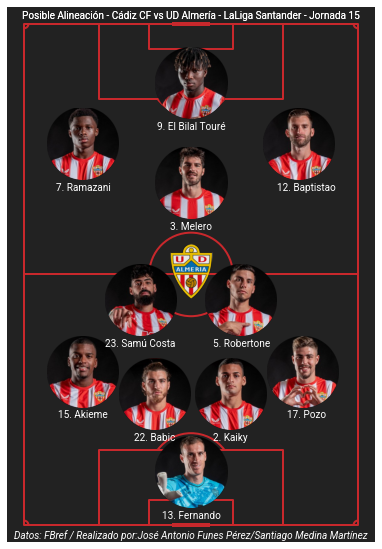

In [150]:
pitch = VerticalPitch(pitch_color='#222222', line_color='#c8282c',
              stripe=False, corner_arcs=True)  # optional stripes
fig, ax = pitch.draw(figsize=(10, 7.727))
# add an image
#ax_image = add_image(
    #lewa_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
#)   # these values might differ when you are plotting
ax_image1 = add_image(foto1, fig, left=0.45, bottom=0.08, width=0.1,
                     alpha=1, interpolation='hanning')
Portero = ('13. Fernando')
fig.text(0.5, 0.06, Portero, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image2 = add_image(foto2, fig, left=0.3, bottom=0.26, width=0.1,
                     alpha=1, interpolation='hanning')
LateralIzq = ('15. Akieme')
fig.text(0.35, 0.242, LateralIzq, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image3 = add_image(foto3, fig, left=0.4, bottom=0.22, width=0.1,
                     alpha=1, interpolation='hanning')
CentralIzq = ('22. Babic')
fig.text(0.45, 0.20, CentralIzq, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image4 = add_image(foto4, fig, left=0.505, bottom=0.22, width=0.1,
                     alpha=1, interpolation='hanning')
CentralDer = ('2. Kaiky')
fig.text(0.555, 0.20, CentralDer, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image5 = add_image(foto5, fig, left=0.605, bottom=0.26, width=0.1,
                     alpha=1, interpolation='hanning')
LateralDer = ('17. Pozo')
fig.text(0.66, 0.242, LateralDer, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image6 = add_image(foto6, fig, left=0.45, bottom=0.6, width=0.1,
                     alpha=1, interpolation='hanning')
MCDIzq = ('23. Samú Costa')
fig.text(0.43, 0.37, MCDIzq, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image7 = add_image(foto7, fig, left=0.52, bottom=0.39, width=0.1,
                     alpha=1, interpolation='hanning')
MCDDer = ('5. Robertone')
fig.text(0.57, 0.37, MCDDer, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image8 = add_image(foto8, fig, left=0.38, bottom=0.39, width=0.1,
                     alpha=1, interpolation='hanning')
MCO = ('3. Melero')
fig.text(0.5, 0.58, MCO, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image9 = add_image(foto9, fig, left=0.45, bottom=0.78, width=0.1,
                     alpha=1, interpolation='hanning')
EtremoIzq = ('7. Ramazani')
fig.text(0.35, 0.65, EtremoIzq, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image10 = add_image(foto10, fig, left=0.3, bottom=0.67, width=0.1,
                     alpha=1, interpolation='hanning')
EtremoDer = ('12. Baptistao')
fig.text(0.66, 0.65, EtremoDer, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")
ax_image11 = add_image(foto11, fig, left=0.6, bottom=0.67, width=0.1,
                     alpha=1, interpolation='hanning')
DelanteroCentro = ('9. El Bilal Touré')
fig.text(0.5, 0.76, DelanteroCentro, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")

ax_image12 = add_image(escudo, fig, left=0.45, bottom=0.44, width=0.1,
                     alpha=0.9, interpolation='hanning')

TEXT = ('Posible Alineación - Cádiz CF vs UD Almería - LaLiga Santander - Jornada 15')
fig.text(0.5, 0.96, TEXT, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")

# add credits
CREDIT_1 = "Datos: FBref / Realizado por:José Antonio Funes Pérez/Santiago Medina Martínez"

TEXT = ('Posible Alineación - Cádiz CF vs UD Almería - LaLiga Santander - Jornada 15')
fig.text(0.5, 0.96, TEXT, size=20, fontproperties=font_normal.prop, ha='center', color="#ffffff")

fig.text( 0.5, 0.025, CREDIT_1, size=9, fontproperties=font_italic.prop, color="#ffffff", ha="center")